### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
y0 : 0.1
T : 15
N_col : 1024
N_hidden : 4
N_neurons : 50
activation : swish
N_epochs : 20000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 10
freq_print : 100
keys_print : ['loss']
reg_epochs : 10000


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

2024-07-31 19:10:50.828360: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 19:10:50.878051: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 19:10:50.879145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 19:10:51.768012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "nested_PINN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7801 (30.47 KB)
Trainable params: 7801 (30.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
*** PINN build & init

### Train Physics-Informed Neural Network

In [3]:
training_log = PINN.train()

Training started...
    0/20000 | loss: -4.44e-01
  100/20000 | loss: -1.21e+00
  200/20000 | loss: -1.35e+00
  300/20000 | loss: -1.35e+00
  400/20000 | loss: -1.35e+00
  500/20000 | loss: -1.36e+00
  600/20000 | loss: -1.38e+00
  700/20000 | loss: -1.39e+00
  800/20000 | loss: -1.38e+00
  900/20000 | loss: -1.41e+00
 1000/20000 | loss: -1.39e+00
 1100/20000 | loss: -1.37e+00
 1200/20000 | loss: -1.42e+00
 1300/20000 | loss: -1.36e+00
 1400/20000 | loss: -1.37e+00
 1500/20000 | loss: -1.37e+00
 1600/20000 | loss: -1.41e+00
 1700/20000 | loss: -1.38e+00
 1800/20000 | loss: -1.40e+00
 1900/20000 | loss: -1.41e+00
 2000/20000 | loss: -1.40e+00
 2100/20000 | loss: -1.42e+00
 2200/20000 | loss: -1.43e+00
 2300/20000 | loss: -1.38e+00
 2400/20000 | loss: -1.39e+00
 2500/20000 | loss: -1.39e+00
 2600/20000 | loss: -1.38e+00
 2700/20000 | loss: -1.39e+00
 2800/20000 | loss: -1.41e+00
 2900/20000 | loss: -1.39e+00
 3000/20000 | loss: -1.39e+00
 3100/20000 | loss: -1.39e+00
 3200/20000 | loss: 

# Plot Section

In [4]:
from model.plots import learning_curves, toy_example_dynamics

### Learning Curves

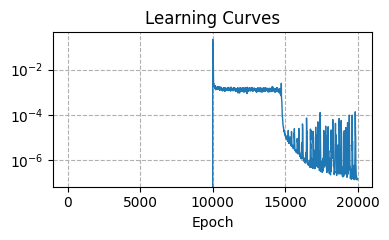

In [5]:
learning_curves(training_log)

### Toy Example Dynamics

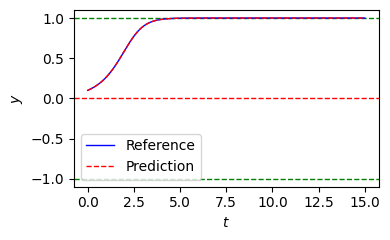

In [6]:
toy_example_dynamics(PINN)